Tamb_min: 4.103080157839738 Tamb_max 26.56602133917541


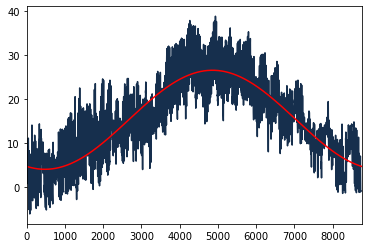

In [478]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns

temp=pd.read_excel("Tamb_input.xls" ,squeeze=True)
Treal=pd.read_excel("Tamb_hourly.xls", squeeze=True)

Tamb_fit=pd.Series(temp)
Tamb=pd.Series(Treal)

mypalette = sns.color_palette(['#162f4d']) # https://www.hsluv.org/
sns.set_palette(mypalette)


Tamb.plot()
Tamb_fit.plot(color='red')
print('Tamb_min:',Tamb_fit.min(),'Tamb_max',Tamb_fit.max())


In [274]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

date_rng = pd.date_range(start='1/1/2019 00:00:00', end='31/12/2019 00:00:00', freq='H')
df = pd.DataFrame(date_rng, columns=['date'])

df['Tamb_fit'] = Tamb_fit
df['Tamb'] = Tamb


df.head(12)
#df[df.index.month==12]



,date,Tamb_fit,Tamb
0,2019-01-01 00:00:00,4.751630,9.100000
1,2019-01-01 01:00:00,4.748935,9.200000
2,2019-01-01 02:00:00,4.746245,9.166667
3,2019-01-01 03:00:00,4.743561,9.183333
4,2019-01-01 04:00:00,4.740882,8.916667
5,2019-01-01 05:00:00,4.738209,8.083333
6,2019-01-01 06:00:00,4.735541,7.766667
7,2019-01-01 07:00:00,4.732878,7.033333
8,2019-01-01 08:00:00,4.730221,6.316667
9,2019-01-01 09:00:00,4.727570,6.216667


# Data manipulation-processing

In [479]:
Tamb_hourly=pd.DataFrame(df, columns = ['date','Tamb','Tamb_fit']) #Ambient temperature on an hourly resolutionT


In [480]:
Tamb_hourly['date'] =pd.to_datetime(Tamb_hourly['date'], infer_datetime_format=True) #Estoy asociando el index de tiempo a la columna Data-Ora
Tamb_hourly=Tamb_hourly.set_index('date')

In [481]:
Tamb_hourly.head()

,Tamb,Tamb_fit
date,,
2019-01-01 00:00:00,9.100000,4.751630
2019-01-01 01:00:00,9.200000,4.748935
2019-01-01 02:00:00,9.166667,4.746245
2019-01-01 03:00:00,9.183333,4.743561
2019-01-01 04:00:00,8.916667,4.740882


In [482]:
Tamb_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8737 entries, 2019-01-01 00:00:00 to 2019-12-31 00:00:00
Data columns (total 2 columns):
Tamb        8737 non-null float64
Tamb_fit    8737 non-null float64
dtypes: float64(2)
memory usage: 204.8 KB


In [483]:
Tamb_hourly.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-12-30 15:00:00', '2019-12-30 16:00:00',
               '2019-12-30 17:00:00', '2019-12-30 18:00:00',
               '2019-12-30 19:00:00', '2019-12-30 20:00:00',
               '2019-12-30 21:00:00', '2019-12-30 22:00:00',
               '2019-12-30 23:00:00', '2019-12-31 00:00:00'],
              dtype='datetime64[ns]', name='date', length=8737, freq=None)

In [461]:
Tamb_hourly.reset_index(inplace=True)

In [263]:
Tamb_hourly['Month'] = Tamb_hourly.index.month


In [484]:
Tamb_hourly

,Tamb,Tamb_fit
date,,
2019-01-01 00:00:00,9.100000,4.751630
2019-01-01 01:00:00,9.200000,4.748935
2019-01-01 02:00:00,9.166667,4.746245
2019-01-01 03:00:00,9.183333,4.743561
2019-01-01 04:00:00,8.916667,4.740882
...,...,...
2019-12-30 20:00:00,0.733333,4.829299
2019-12-30 21:00:00,-0.100000,4.826452
2019-12-30 22:00:00,-0.250000,4.823610


In [485]:
Tmin_i = float(input("Enter min setpoint temperature: "))
Tmax_i = float(input("Enter max setpoint temperature: "))

Enter min setpoint temperature:  46.25
Enter max setpoint temperature:  55


In [486]:
def climatic_curve(Tamb_h):
    Tmin_o = 2.38 #minimum outdoor T threshold in which the space heating system turns on
    Tmax_o = 7.25 #maximum outdoor T threshold in which the space heating system turns off

    if Tamb_h <= Tmin_o:   
        Tsh = Tmax_i
    elif Tamb_h >= Tmax_o:
        Tsh = Tmin_i
    else:
        m = (Tmax_i-Tmin_i)/(Tmin_o-Tmax_o)
        b = -m*Tmin_o+Tmax_i
        Tsh = m*Tamb_h+b
    return Tsh
 

In [487]:
Tamb_hourly['Tsh'] = Tamb_hourly['Tamb'].apply(lambda x: climatic_curve(x))
#Tamb_hourly['Tsh'] = Tamb['Temp'].apply(lambda x: climatic_curve(x))


In [488]:
Tdhw = float(input("Enter domestic hot water temperature: "))

Tamb_hourly["Tdhw"] =Tdhw

Enter domestic hot water temperature:  55


In [489]:
Tamb_hourly.head(12)


,Tamb,Tamb_fit,Tsh,Tdhw
date,,,,
2019-01-01 00:00:00,9.100000,4.751630,46.250000,55.0
2019-01-01 01:00:00,9.200000,4.748935,46.250000,55.0
2019-01-01 02:00:00,9.166667,4.746245,46.250000,55.0
2019-01-01 03:00:00,9.183333,4.743561,46.250000,55.0
2019-01-01 04:00:00,8.916667,4.740882,46.250000,55.0
2019-01-01 05:00:00,8.083333,4.738209,46.250000,55.0
2019-01-01 06:00:00,7.766667,4.735541,46.250000,55.0
2019-01-01 07:00:00,7.033333,4.732878,46.639288,55.0
2019-01-01 08:00:00,6.316667,4.730221,47.926934,55.0


In [454]:
Tamb_hourly=Tamb_hourly.set_index('date')

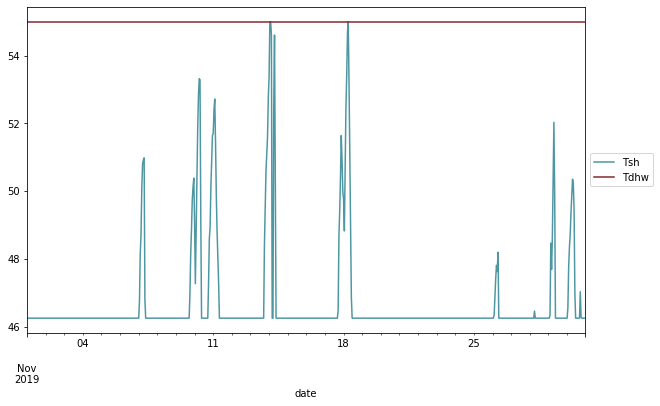

In [500]:
mes=Tamb_hourly[Tamb_hourly.index.month == 11 ]
mes[["Tsh","Tdhw"]].plot(figsize=(10,6), color=["#4e97a2",'#82272e'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [76]:
Tamb_hourly[["Tsh","Tdhw"]].dtypes

Tsh     float64
Tdhw    float64
dtype: object

In [496]:
def Tuser(col):
    Tsh=col["Tsh"]
    Tdhw=col["Tdhw"]
    fecha=col.name
    #Las proporciones dependen de la localización
    if fecha.month==1:
        resultado= 0.98*Tsh+0.02*Tdhw
       
    elif fecha.month==2:
        resultado=0.96*Tsh+0.04*Tdhw
    
    elif fecha.month==3:
        resultado=0.94*Tsh+0.06*Tdhw
    
    elif fecha.month==4:
        resultado=0.90*Tsh+0.1*Tdhw
    
    elif fecha.month==5:
        resultado=0.75*Tsh+0.25*Tdhw
    
    elif fecha.month==6:
        resultado=0.25*Tsh+0.75*Tdhw
    
    elif fecha.month==7:
        resultado=0*Tsh+1.0*Tdhw
    
    elif fecha.month==8:
        resultado=0*Tsh+1.0*Tdhw
    
    elif fecha.month==9:
        resultado=0.1*Tsh+0.9*Tdhw
    
    elif fecha.month==10:
        resultado=0.80*Tsh+0.2*Tdhw
    
    elif fecha.month==11:
        resultado=0.95*Tsh+0.05*Tdhw
    
    elif fecha.month==12:
        resultado=0.97*Tsh+0.03*Tdhw
        
    return resultado

In [497]:
Tamb_hourly["Tuser"] = Tamb_hourly.apply(lambda x: Tuser(x), axis=1)

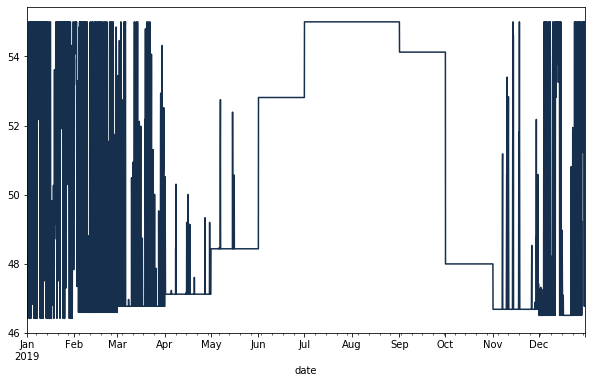

In [498]:
Tamb_hourly["Tuser"].plot(figsize=(10,6))

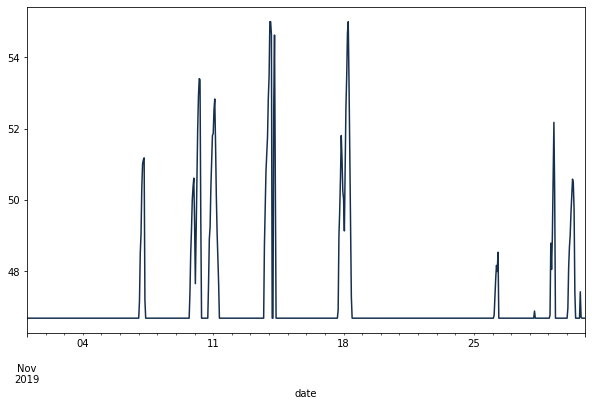

In [501]:
mes["Tuser"].plot(figsize=(10,6))

# Network temperature 

In [503]:
from math import exp, cos, sqrt, pi

zz=1               #Depth [m]
alpha=0.06048      #Ground thermal diffusivity, Banks [m^2/day]
alpha_sec=7e-7 #Ground thermal diffusivity, Banks [m^2/s]
t_sec=365*24*3600
d_shift_max = Tamb_hourly['Tamb_fit'].idxmax(axis=0)
dd_max=(Tamb_hourly.index.get_loc(d_shift_max))/24

Tg_und = Tamb.mean() #T_ave_fit #Undisturbed ground temperature
DT_y= 11.23 #abs(DT_y_fit)



In [507]:
def ground_temperature_hour(t,zz):
    #t is time in hours, but the calculation is done is seconds
    T_banks= Tg_und+DT_y*exp(-zz*sqrt(pi/(alpha_sec*t_sec)))*cos(2*pi/t_sec*(t-dd_max*24)*3600-zz*sqrt(pi/(alpha_sec*t_sec)))
    
    return  (pd.Series(T_banks))

In [508]:
h=pd.Series(range(1, 8738))
T_ground=h.apply(lambda x: ground_temperature_hour(x,1))

df2 =pd.DataFrame(T_ground, columns=['Tground'])
df2['Tground'] = T_ground

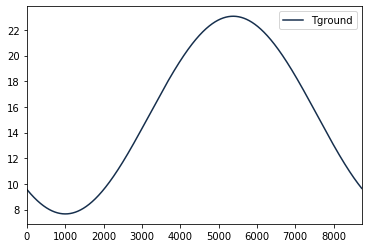

In [509]:
df2.plot()

In [516]:
depth_aquifer= float(input("""Aquifer temperature depth:
"""))

Aquifer temperature depth:
 30


In [517]:
Taq = h.apply(lambda x: ground_temperature_hour(x,depth_aquifer))

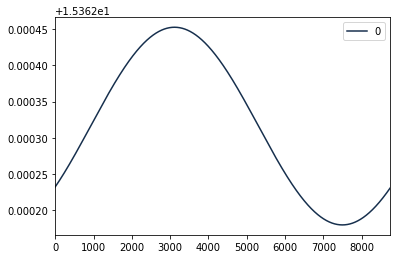

In [518]:
Taq.plot()

In [519]:
df2["Taq"] = Taq

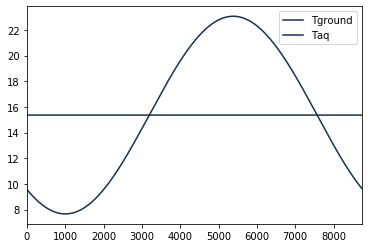

In [520]:
df2.plot()

In [521]:
Ts1 = float(input("""Temperature of source 1: 
"""))

Ts2 = float(input("""Temperature of source 2: 
"""))


Temperature of source 1: 
 21
Temperature of source 2: 
 21


In [522]:
df2['Ts1'] = Ts1

if Ts2 !=0:
    df2["Ts2"] = Ts2
    df2["Tnet"]=  df2[["Ts1", "Ts2"]].max(axis=1) #If s1 and s2 exists, Tnet is equal to the source of highest T
else:
    df2["Ts2"] = Ts2 #If s2 does not exist, Tnet is equal to s1
    df2["Tnet"]=  Ts1

if Ts1 == 0 and Ts2 == 0 :
        df2["Tnet"]= Taq #If neither s1 nor s2 exist


In [523]:
df2

,Tground,Taq,Ts1,Ts2,Tnet
0,9.562255,15.362232,21.0,21.0,21.0
1,9.558623,15.362232,21.0,21.0,21.0
2,9.554994,15.362232,21.0,21.0,21.0
3,9.551368,15.362232,21.0,21.0,21.0
4,9.547745,15.362233,21.0,21.0,21.0
...,...,...,...,...,...
8732,9.665159,15.362230,21.0,21.0,21.0
8733,9.661444,15.362230,21.0,21.0,21.0
8734,9.657732,15.362230,21.0,21.0,21.0
8735,9.654023,15.362230,21.0,21.0,21.0


# Coefficient of performance (COP)

In [525]:
Tamb_hourly.reset_index(inplace=True)

In [527]:
DT_evap =float(input("""Temperature difference among the supply and return pipes: 
#"""))

DT_hx=2.5
n_HP = 0.53
Te_o =df2['Tnet']-DT_evap-DT_hx
Tc_o =Tamb_hourly['Tuser']

df2['COP']= 1-n_HP+n_HP*(Tc_o+273.15)/(Tc_o+DT_hx-Te_o)

Temperature difference among the supply and return pipes: 
# 5


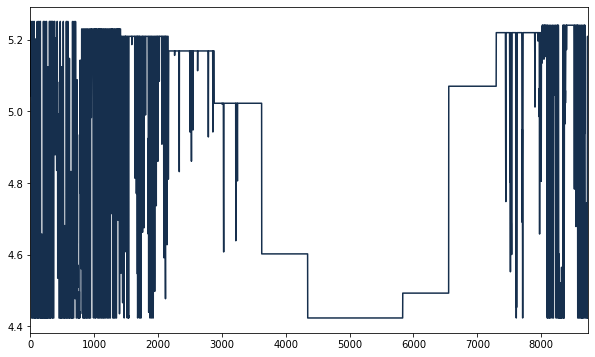

In [528]:
df2['COP'].plot(figsize=(10,6))
#Tc_o.plot()